In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("data/data.csv", encoding="latin1")

/var/folders/sw/cm19dpq55fn6l6rfvytn6n500000gn/T/ipykernel_4556/1452979479.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data.csv", encoding="latin1")


In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [9]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [11]:
df.sample(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
359470,765.0,03-11-14,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",14.0,18.0,67.0,NaN,"Anna Nagar, Chennai",NaN,2014-11-03
154946,NaN,19-12-05,Kerala,Kottayam,NaN,Residential and others,6.1,23.5,49.0,NaN,Kottayam,NaN,2005-12-19
20597,467.0,16-09-13,Andhra Pradesh,Visakhapatnam,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",13.0,17.0,80.0,NaN,"Ganapuram Area, Visakhapatnam",NaN,2013-09-16
415120,384,13-12-04,West Bengal,Durgapur,West Bengal State Pollution Control Board,Industrial Area,NaN,49.0,226.3,378.3,"Kwality Hotel, Benachiti, Durgapur",NaN,2004-12-13
139491,NaN,12/11/2007,Karnataka,Bangalore,NaN,Residential and others,15.1,39.6,63.0,194.0,Yeshwanthpura,NaN,2007-11-12


In [12]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

/Users/anastasiia/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'so2 by state and year'}, xlabel='year', ylabel='state'>

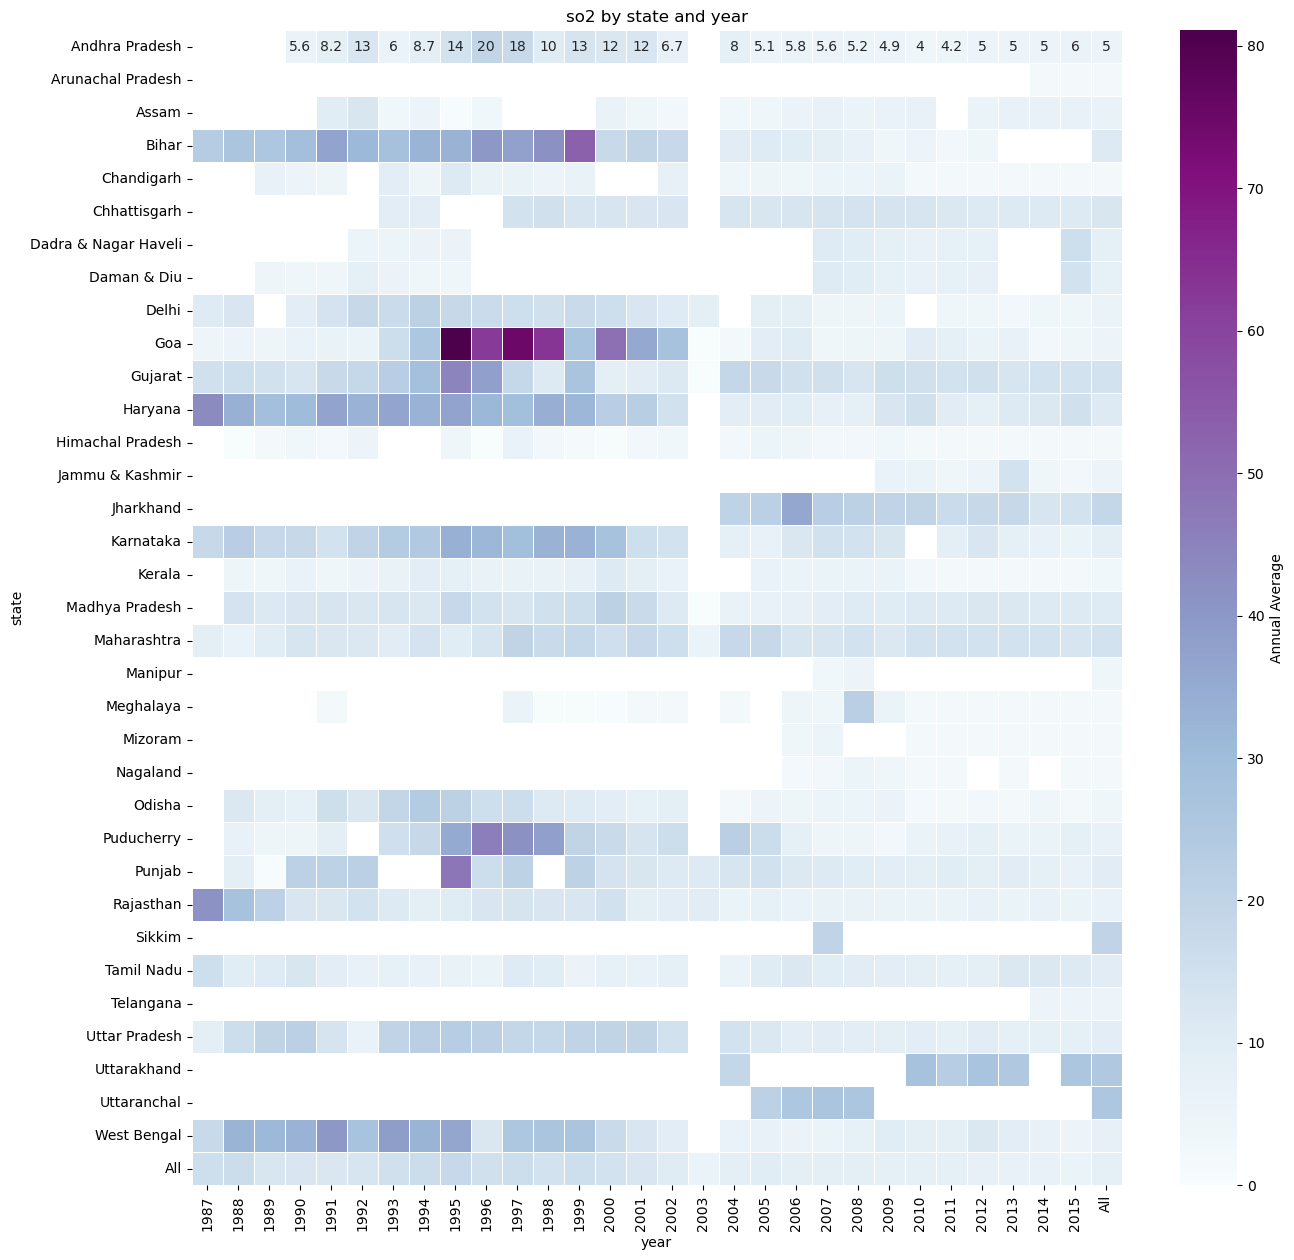

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = df.copy()
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")  # date parse
data["year"] = data["date"].dt.year  # year
data["year"] = data["year"].fillna(0.0).astype(int)
data = data[(data["year"] > 0)]


# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15, 15))
ax.set_title("{} by state and year".format("so2"))
sns.heatmap(
    data.pivot_table(
        "so2", index="state", columns=["year"], aggfunc="median", margins=True
    ),
    annot=True,
    cmap="BuPu",
    linewidths=0.5,
    ax=ax,
    cbar_kws={"label": "Annual Average"},
)